
<strong>FILE:</strong> bioinformatic_proyecto.ipynb

<strong>PYTHON_VERSION:</strong> 3.8.3

<strong>AUTHOR:</strong> <a href="https://www.linkedin.com/in/sebastianjr/">Sebastian Janampa</a> & <a href="https://www.linkedin.com/in/cristinamallquiacosta/">Cristina Mallqui</a>

<strong>CREATE DATE:</strong> /03/2021 (DD/MM/YYYY)

<strong>COMPLEMENTED FILES:</strong> utils.py

<strong>AVAILABILITY OF DATA:</strong> <a href="http://tblab.pa.icar.cnr.it/public/BMC-CIBB_suppl/datasets/">link</a>

---
This proyect is based on this <a href="https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-018-2182-6">paper</a> by **Antonino Fiannaca**. We will use **_Deep Convolutional Neural Networks (DCNN)_** to improve the results from Fiannaca's Paper. This notebook is divided in:
1. Replication of the project
1. Deeper Models
1. Residual Neural Networks

---
## Import libraries

In [1]:
from sklearn.model_selection import StratifiedKFold, train_test_split
import numpy as np
import utils

## Replication of the project
In this section, we will implement a **_Simple Convolutional Neural Networks_**. The model used in this section is from the function **_create_model_** of this <a href="https://github.com/IcarPA-TBlab/MetagenomicDC/blob/master/models/CNN.py">GitHub Notebook</a>. Here, we will only used the **_16S_AMP_pos_G_** and **_16S_SG_pos_G_** files.

First, we will apply the **_K-folding validation_** with a **_K_** equals to $10$.

**Note:** Probably, you can experience a _Memory Size_ problem

In [2]:
# Parameters
k_folds = 10
files = ['16S_SG_pos_G.txt', '16S_AMP_pos_G.txt']
for file in files:
    print('*'*65,'\nFILE: %s'%file)
    # Import dataset
    X, Y, nb_classes, input_length = utils.load_data(file)
    # Training
    k = 1
    kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
    scores = []
    for train, test in kfold.split(X, Y):
        print('%02i/%02i folding: \t'%(k, k_folds), end='')
        model = utils.myModel(utils.myRepModel, nb_classes)
        score = utils.train_and_evaluate_model(model, 
                                               X[train], Y[train], X[test], Y[test], 
                                               nb_classes, 
                                               num_epochs=100, batchsize=20)
        scores.append(score)
        del model, score
        k += 1
    scores = np.array(scores)
    del X, Y, nb_classes, input_length
    print('Results: %.3f +- %.3f'%(scores.mean(), scores.std()))

***************************************************************** 
FILE: 16S_SG_pos_G.txt
01/10 folding: 	Training_acc:  1.000 --- Testing_acc: 0.812
02/10 folding: 	Training_acc:  1.000 --- Testing_acc: 0.817
03/10 folding: 	Training_acc:  1.000 --- Testing_acc: 0.804
04/10 folding: 	Training_acc:  1.000 --- Testing_acc: 0.793
05/10 folding: 	Training_acc:  1.000 --- Testing_acc: 0.799
06/10 folding: 	Training_acc:  1.000 --- Testing_acc: 0.806
07/10 folding: 	Training_acc:  1.000 --- Testing_acc: 0.796
08/10 folding: 	Training_acc:  1.000 --- Testing_acc: 0.796
09/10 folding: 	Training_acc:  1.000 --- Testing_acc: 0.802
10/10 folding: 	Training_acc:  1.000 --- Testing_acc: 0.803
Results: 0.803 +- 0.007
***************************************************************** 
FILE: 16S_AMP_pos_G.txt
01/10 folding: 	Training_acc:  1.000 --- Testing_acc: 0.903
02/10 folding: 	Training_acc:  1.000 --- Testing_acc: 0.909
03/10 folding: 	Training_acc:  1.000 --- Testing_acc: 0.908
04/10 folding: 

Second, we will evaluate how verify the progress of the accuracy ove epoch.

***************************************************************** 
FILE: 16S_SG_pos_G.txt
    Epoch 0001/0100: loss: 1.672 - accuracy: 0.568 - val_loss: 0.665 - val_accuracy: 0.796 - 
    Epoch 0040/0100: loss: 0.006 - accuracy: 0.999 - val_loss: 1.209 - val_accuracy: 0.813 - 
    Epoch 0080/0100: loss: 0.003 - accuracy: 0.999 - val_loss: 1.761 - val_accuracy: 0.806 - 
    Epoch 0100/0100: loss: 0.002 - accuracy: 0.999 - val_loss: 2.225 - val_accuracy: 0.811 - 
***************************************************************** 
FILE: 16S_AMP_pos_G.txt
    Epoch 0001/0100: loss: 0.620 - accuracy: 0.819 - val_loss: 0.254 - val_accuracy: 0.904 - 
    Epoch 0040/0100: loss: 0.004 - accuracy: 0.999 - val_loss: 0.702 - val_accuracy: 0.911 - 
    Epoch 0080/0100: loss: 0.003 - accuracy: 0.999 - val_loss: 1.055 - val_accuracy: 0.903 - 
    Epoch 0100/0100: loss: 0.002 - accuracy: 1.000 - val_loss: 1.102 - val_accuracy: 0.900 - 
***************************************************************** 


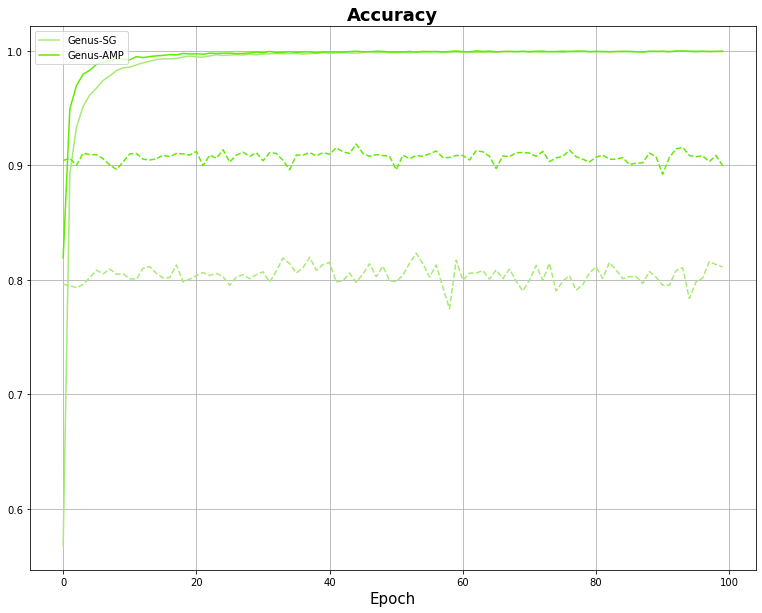

In [3]:
files = ['16S_SG_pos_G.txt', '16S_AMP_pos_G.txt']
histories = {}
for file in files:
    print('*'*65,'\nFILE: %s'%file)
    X,Y,nb_classes,input_length = utils.load_data(file)
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=42)
    del X, Y
    model = utils.myModel(utils.myRepModel, nb_classes)
    histories[file] = utils.train_and_evaluate_model(model,
                                                     Xtrain, Ytrain, Xtest, Ytest,
                                                     nb_classes, callbacks=True,
                                                     batchsize=20, num_epochs=100)
    del model, Xtrain, Ytrain, Xtest, Ytest,nb_classes
print('*'*65,'\nPlotting figure')
utils.plot_results(histories)

---
## Deeper Models
In this section, deeper models are implemented based on:
 * VGG
 * Residual Neural Networks

***************************************************************** 
FILE: 16S_SG_pos_G.txt
    Epoch 0001/0100: loss: 3.640 - accuracy: 0.141 - val_loss: 7.221 - val_accuracy: 0.009 - 
    Epoch 0040/0100: loss: 0.061 - accuracy: 0.986 - val_loss: 3.777 - val_accuracy: 0.559 - 
    Epoch 0080/0100: loss: 0.032 - accuracy: 0.994 - val_loss: 3.142 - val_accuracy: 0.601 - 
    Epoch 0100/0100: loss: 0.019 - accuracy: 0.996 - val_loss: 3.158 - val_accuracy: 0.616 - 
***************************************************************** 
FILE: 16S_AMP_pos_G.txt
    Epoch 0001/0100: loss: 1.074 - accuracy: 0.708 - val_loss: 4.214 - val_accuracy: 0.131 - 
    Epoch 0040/0100: loss: 0.024 - accuracy: 0.994 - val_loss: 1.149 - val_accuracy: 0.864 - 
    Epoch 0080/0100: loss: 0.010 - accuracy: 0.998 - val_loss: 0.984 - val_accuracy: 0.870 - 
    Epoch 0100/0100: loss: 0.018 - accuracy: 0.996 - val_loss: 1.098 - val_accuracy: 0.868 - 
***************************************************************** 


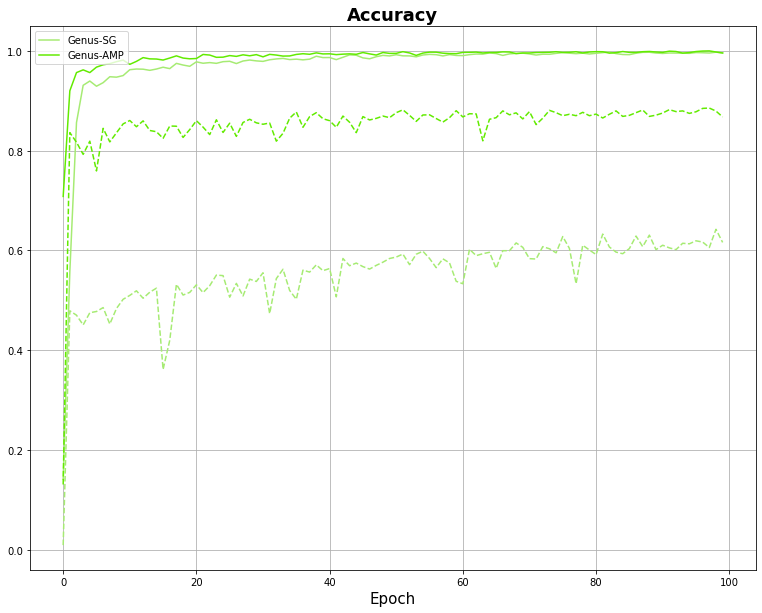

In [4]:
files = ['16S_SG_pos_G.txt', '16S_AMP_pos_G.txt']
histories = {}
for file in files:
    print('*'*65,'\nFILE: %s'%file)
    X,Y,nb_classes,input_length = utils.load_data(file)
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=42)
    del X, Y
    model = utils.myModel(utils.VGG, nb_classes, model='11')
    histories[file] = utils.train_and_evaluate_model(model, 
                                                     Xtrain, Ytrain, Xtest, Ytest,
                                                     nb_classes, callbacks=True, 
                                                     batchsize=64, num_epochs=100)
    del model, Xtrain, Ytrain, Xtest, Ytest,nb_classes
print('*'*65,'\nPlotting figure')
utils.plot_results(histories)

***************************************************************** 
FILE: 16S_SG_pos_G.txt
    Epoch 0001/0100: loss: 4.308 - accuracy: 0.056 - val_loss: 9.833 - val_accuracy: 0.009 - 
    Epoch 0040/0100: loss: 0.042 - accuracy: 0.988 - val_loss: 4.401 - val_accuracy: 0.502 - 
    Epoch 0080/0100: loss: 0.016 - accuracy: 0.996 - val_loss: 4.070 - val_accuracy: 0.522 - 
    Epoch 0100/0100: loss: 0.009 - accuracy: 0.997 - val_loss: 4.057 - val_accuracy: 0.542 - 
***************************************************************** 
FILE: 16S_AMP_pos_G.txt
    Epoch 0001/0100: loss: 1.599 - accuracy: 0.561 - val_loss: 4.101 - val_accuracy: 0.132 - 
    Epoch 0040/0100: loss: 0.031 - accuracy: 0.992 - val_loss: 0.905 - val_accuracy: 0.851 - 
    Epoch 0080/0100: loss: 0.017 - accuracy: 0.995 - val_loss: 1.037 - val_accuracy: 0.817 - 
    Epoch 0100/0100: loss: 0.021 - accuracy: 0.995 - val_loss: 1.158 - val_accuracy: 0.856 - 
***************************************************************** 


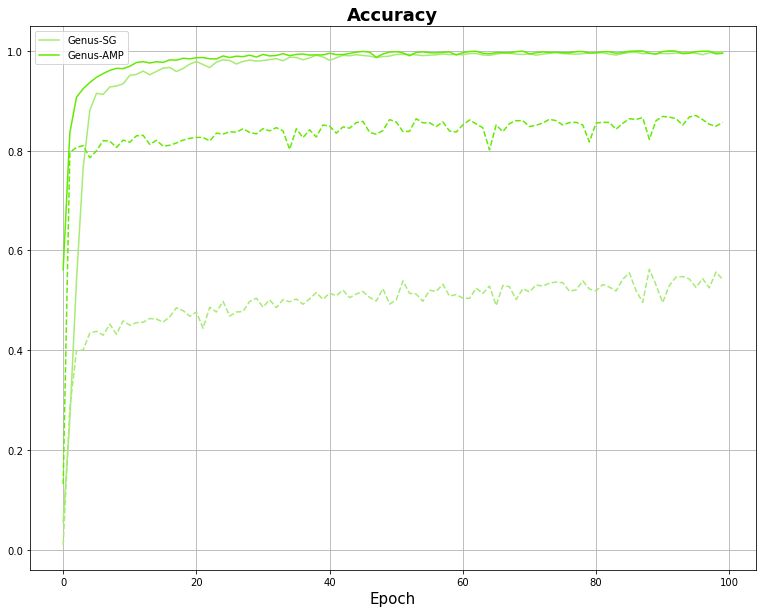

In [7]:
files = ['16S_SG_pos_G.txt', '16S_AMP_pos_G.txt']
histories = {}
for file in files:
    print('*'*65,'\nFILE: %s'%file)
    X,Y,nb_classes,input_length = utils.load_data(file)
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=42)
    del X, Y
    model = utils.myModel(utils.VGG, nb_classes, model='19')
    histories[file] = utils.train_and_evaluate_model(model, 
                                                     Xtrain, Ytrain, Xtest, Ytest,
                                                     nb_classes, callbacks=True, 
                                                     batchsize=64, num_epochs=100)
    del model, Xtrain, Ytrain, Xtest, Ytest,nb_classes
print('*'*65,'\nPlotting figure')
utils.plot_results(histories)

***************************************************************** 
FILE: 16S_SG_pos_G.txt
    Epoch 0001/0100: loss: 4.605 - accuracy: 0.011 - val_loss: 4.605 - val_accuracy: 0.009 - 
    Epoch 0040/0100: loss: 4.566 - accuracy: 0.019 - val_loss: 4.770 - val_accuracy: 0.009 - 
    Epoch 0080/0100: loss: 4.552 - accuracy: 0.021 - val_loss: 4.587 - val_accuracy: 0.015 - 
    Epoch 0100/0100: loss: 4.545 - accuracy: 0.022 - val_loss: 4.594 - val_accuracy: 0.016 - 
***************************************************************** 
FILE: 16S_AMP_pos_G.txt
    Epoch 0001/0100: loss: 4.563 - accuracy: 0.011 - val_loss: 4.563 - val_accuracy: 0.008 - 
    Epoch 0040/0100: loss: 4.509 - accuracy: 0.022 - val_loss: 5.834 - val_accuracy: 0.016 - 
    Epoch 0080/0100: loss: 4.462 - accuracy: 0.032 - val_loss: 4.523 - val_accuracy: 0.021 - 
    Epoch 0100/0100: loss: 4.440 - accuracy: 0.034 - val_loss: 4.959 - val_accuracy: 0.014 - 
***************************************************************** 


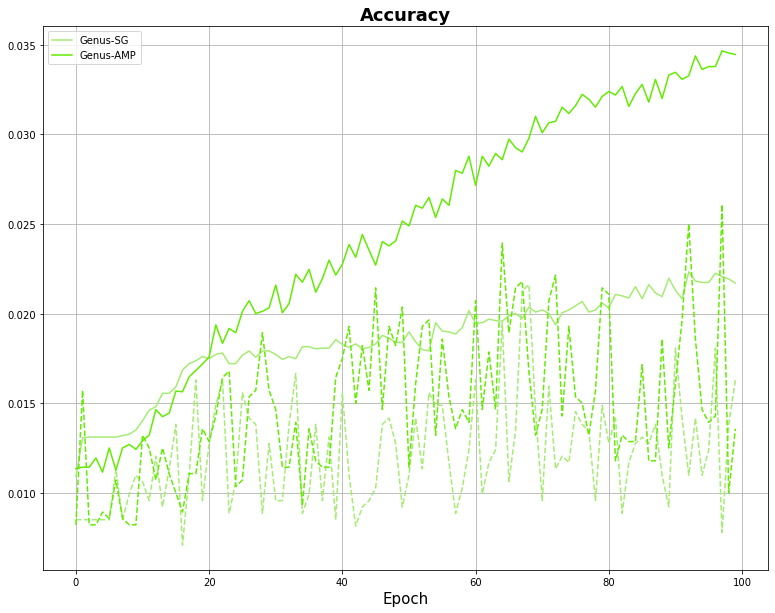

In [6]:
files = ['16S_SG_pos_G.txt', '16S_AMP_pos_G.txt']
histories = {}
for file in files:
    print('*'*65,'\nFILE: %s'%file)
    X,Y,nb_classes,input_length = utils.load_data(file)
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=42)
    del X, Y
    model = utils.myModel(utils.ResNet, nb_classes, model='ResNet18')
    histories[file] = utils.train_and_evaluate_model(model, 
                                                     Xtrain, Ytrain, Xtest, Ytest,
                                                     nb_classes, callbacks=True, 
                                                     batchsize=64, num_epochs=100)
    del model, Xtrain, Ytrain, Xtest, Ytest,nb_classes
print('*'*65,'\nPlotting figure')
utils.plot_results(histories)